# Ejercicios sobre suavizado mediante Kernel

1. Para el dataset de `wage` (salario), y usando como variable independiente `age`. Realice procesos de suavizado involucrando kernels (pruebe con los tres kernels vistos) y también realice una regresión local usando el kernel de epanechinov.  Para este ejercicio no es necesario usar la división de training y test.

2. Cree una nueva clase binaria, en donde una clase corresponda a los salarios mayores a 250 y la otra a los menores. Realice una clasificación usando el clasificador de Naive Bayes. Pruebe el resultado con un Test set y con la métrica de acuracy y la matriz de confusión.

In [3]:
# Cargamos las librerias

import numpy as np

from numpy.linalg import inv,pinv

from numpy.random import uniform
from numpy.random import normal

import pandas as pd

from scipy.stats import norm

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# wage dataset 
wage = pd.read_csv("wage.csv")
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [5]:
wage.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [6]:
X=wage[['year', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage']]
y=wage[['age']]

In [7]:

wage2=wage[['age','wage']]
wage2=wage2.sort_values('age')
wage2


,age,wage
0,18,75.043154
820,18,69.619037
29,18,70.476020
2327,18,72.150456
512,18,41.704990
...,...,...
1384,77,99.689464
2167,80,82.679637
2022,80,87.981033
1565,80,94.072715


In [8]:
wage2.describe()

,age,wage
count,3000.000000,3000.000000
mean,42.414667,111.703608
std,11.542406,41.728595
min,18.000000,20.085537
25%,33.750000,85.383940
50%,42.000000,104.921507
75%,51.000000,128.680488
max,80.000000,318.342430


In [9]:
medias=[]
edad=np.unique(wage2['age'])
for i in edad:
    if i in wage2['age']:
        x = wage2.loc[wage2['age']== i,['wage']]
        medias.append( np.mean(x.values))

In [10]:
edad=np.unique(wage2['age'])
len(edad)

61

In [11]:
d = {'age': edad, 'wage': medias}
df = pd.DataFrame(data=d)
df

,age,wage
0,18,64.493063
1,19,53.990486
2,20,69.033341
3,21,75.906952
4,22,72.251667
...,...,...
56,74,106.192881
57,75,69.389644
58,76,109.219665
59,77,99.689464


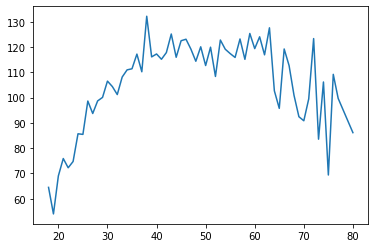

In [12]:
plt.plot(df.age,df.wage)

## KNN

In [25]:
X=df['age']
Y=df['wage']
y=Y

In [26]:
y_hat_30_nearest = np.zeros(y.shape)
for i in range(X.shape[0]):
    x0 = X[i]
    y_hat_30_nearest[i] = np.mean(Y[np.argsort(np.abs(X - x0))][:10])


##  Epanechnikov

In [27]:
y_hat_02_epa = np.zeros(y.shape)
for i in range(X.shape[0]):
    x0 = X[i]
   
    t = np.abs(X - x0)/10
    d = (t<=1)*3/4*(1-t**2) # kernel de Epanechnikov     
    y_hat_02_epa[i] = np.sum(d*Y)/np.sum(d)


## Tricúbico

In [28]:
y_hat_02_tri = np.zeros(y.shape)
for i in range(X.shape[0]):
    x0 = X[i] 
    t = np.abs(X - x0)/5
    d3 = (t<=1)*(1-t**3)**3 # kernel tricubico
    y_hat_02_tri[i] = np.sum(d3*Y)/np.sum(d3)

## Graficas

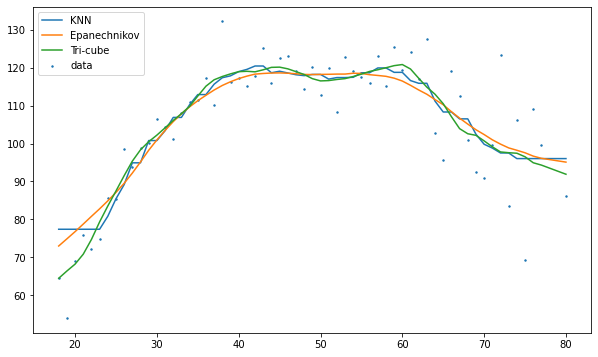

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, s=2, label='data')
plt.plot(X, y_hat_30_nearest, label='KNN')
plt.plot(X, y_hat_02_epa, label='Epanechnikov')
plt.plot(X, y_hat_02_tri, label='Tri-cube')
plt.legend();

**Cree una nueva clase binaria, en donde una clase corresponda a los salarios mayores a 250 y la otra a los menores. Realice una clasificación usando el clasificador de Naive Bayes. Pruebe el resultado con un Test set y con la métrica de acuracy y la matriz de confusión.**

In [50]:
df3 = pd.get_dummies(wage, drop_first=True)
del(df3['logwage'])
del(df3['wage'])

In [51]:
binary=[]
for i in wage.wage:
    if i<=250:
        #1 a los menores
        binary.append(1)
    else:
        binary.append(0)
        
df2=df3.assign(Binary=binary)
df2

,year,age,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No,Binary
0,2006,18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2004,24,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
2,2003,45,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2003,43,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1
4,2005,50,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2996,2007,30,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1
2997,2005,27,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2998,2005,27,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [76]:
X = df2.drop(columns='Binary')
y = df2['Binary']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [77]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [78]:
print("La exactitud (accuracy) de clasificación con el clasificador de NB es:", clf.score(X_test, y_test))

La exactitud (accuracy) de clasificación con el clasificador de NB es: 0.23666666666666666


In [79]:
df2['Binary'].value_counts()/(df3.shape[0])

1    0.973667
0    0.026333
Name: Binary, dtype: float64

In [80]:
y_pred=clf.predict(X_test)

In [81]:
confusion_matrix(y_test, y_pred)

array([[  9,   0],
       [229,  62]], dtype=int64)

*Eliminando las columnas matril y race*

In [87]:
df4 = df2
del(df4['maritl_2. Married'])
del(df4['maritl_3. Widowed'])
del(df4['maritl_4. Divorced'])
del(df4['maritl_5. Separated'])
del(df4['race_2. Black'])
del(df4['race_3. Asian'])
del(df4['race_4. Other'])
df4

,year,age,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No,Binary
0,2006,18,0,0,0,0,0,0,1,1
1,2004,24,0,0,1,0,1,1,1,1
2,2003,45,0,1,0,0,0,0,0,1
3,2003,43,0,0,1,0,1,1,0,1
4,2005,50,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,0,1,0,0,0,1,0,1
2996,2007,30,1,0,0,0,0,1,1,1
2997,2005,27,0,0,0,0,0,0,1,1
2998,2005,27,0,1,0,0,0,1,0,1


In [94]:
X = df4.drop(columns='Binary')
y = df4['Binary']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [96]:
print("La exactitud (accuracy) de clasificación con el clasificador de NB es:", clf.score(X_test, y_test))

La exactitud (accuracy) de clasificación con el clasificador de NB es: 0.9053333333333333


In [97]:
y_pred=clf.predict(X_test)

In [98]:
confusion_matrix(y_test, y_pred)

array([[  9,   8],
       [ 63, 670]], dtype=int64)

**Conclusiones:** Observamos que al utilizar todas las variables excepto wage y logwage no es tan exacto al hacer la clasificación ya que obtenemos una precisión de 23,66%, pero al eliminar las variables que viendo su relación con respecto al año y edad no tienen gran relevancia en la clasificación del salario logramos una mejor precisión del 90.53%.  
Con estas precisiones obtuvimos los siguientes resultados en la matriz de confusión:  
  
* Todos los ceros ubicados bien teniendo en cuenta el test, 229 unos fueron mal clasificados, solo 62 estaban correctos.
* 9 ceros bien ubicados y 8 mal clasificados, sólo 63 unos mal clasificados estando 670 bien ubicados.

Notamos una gran mejoría en la clasificación comparando las dos pruebas realizadas.